## Sleep Health Analysis

### Business objective: create a new health app. 

##### Original idea: Create a wearable device that helps users increase daily activity, which is widely believed to impact sleep duration and quality, leading to better overall health outcomes.

In [1]:
import numpy as np
import scipy as sp 
import pandas as pd 
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import cleaning as cl
import functions as fn
import importlib
importlib.reload(cl)
importlib.reload(fn)
from scipy.stats import pearsonr
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

In [2]:
# import data
health = pd.read_csv("/Users/chandlershortlidge/Desktop/Ironhack/sleep-heath-analysis/data/Sleep_health_and_lifestyle_dataset.csv")

In [3]:
# coloumn names and data types
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
# use wrapper function to clean data
health = cl.clean_data(health)
# fill NaN values with "None"
# turn columns into lowercase
# replace " " with "_" in column nanes
# rename columns
# remove duplicates
health.head()

,id,gender,age,occupation,sleep_hours,sleep_quality,activity_min_per_day,stress_level,bmi_category,blood_pressure,rhr,daily_steps,sleep_disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# EDA

# Sleep and activity

- H0: There is no relationship between sleep duration and physical fitness duration.
- H1: There is a statistically significant relationship between these variables.

Text(0, 0.5, 'Sleep Hours per Night')

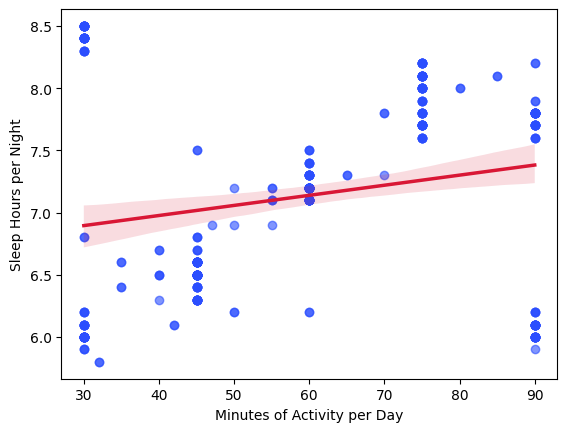

In [38]:
sns.regplot(
    data=health,
    x="activity_min_per_day",
    y="sleep_hours",
    scatter_kws={'color': "#2b4efe", 'alpha': 0.6},
    line_kws={'color': "#d91735", 'linewidth': 2.5}
)
plt.xlabel("Minutes of Activity per Day")
plt.ylabel("Sleep Hours per Night")

**Observations:** 
Generally, more physical activity associates with more sleep. But the clusters suggest the data might be somewhat artificial or grouped (maybe survey categories?).

In [6]:
from scipy.stats import pearsonr
correlation, p_value = pearsonr(health['activity_min_per_day'], health['sleep_hours'])
r_squared = correlation ** 2
r_squared_percent = r_squared * 100
print("Correlation, Activity & Sleep: ", correlation)
print("P-value, Activity & Sleep: ", p_value)
print("r-squared: ", r_squared)
print(f"r-squared percent: {r_squared_percent:.2f}%")

Correlation, Activity & Sleep:  0.21236031472575906
P-value, Activity & Sleep:  3.4666184358492465e-05
r-squared:  0.04509690327042344
r-squared percent: 4.51%


**Observations:** A correlation coefficient of 0.21 shows a slightly positive relationship between the variables. Further analysis shows an r-squared of 0.04. This means only 4% of the variation in people's sleep can be attributed to activity levels. The other 96% is due to other factors. A p-value well below 0.05 shows strong statistical evidence against our null hypothesis, suggesting that there is a statistically significant relationship between sleep duration and physical fitness duration.

But the weak correlation and r-squared warrents further data exploration in order to find out what most impacts sleep.

## Correlation analysis: sleep duration

We'll run a correlation analysis to see which variables most impact sleep duration.

In [40]:
# Pick predictors and outcome
features = ["age", "sleep_quality", "activity_min_per_day", "stress_level", "bmi_category", 
            "blood_pressure", "rhr", "daily_steps", "sleep_disorder"]
outcome = "sleep_hours"

# Calculate correlations with outcome
correlations = health[features + [outcome]].corr(numeric_only=True)[outcome].sort_values(ascending=False)

print(correlations)

sleep_hours             1.000000
sleep_quality           0.883213
age                     0.344709
activity_min_per_day    0.212360
daily_steps            -0.039533
rhr                    -0.516455
stress_level           -0.811023
Name: sleep_hours, dtype: float64


**Observations:** Stress level has an almost perfect negative correlation (-0.8) with sleep hours. Let's explore this further.

### Stress and sleep

Text(0, 0.5, 'Sleep Hours per Night')

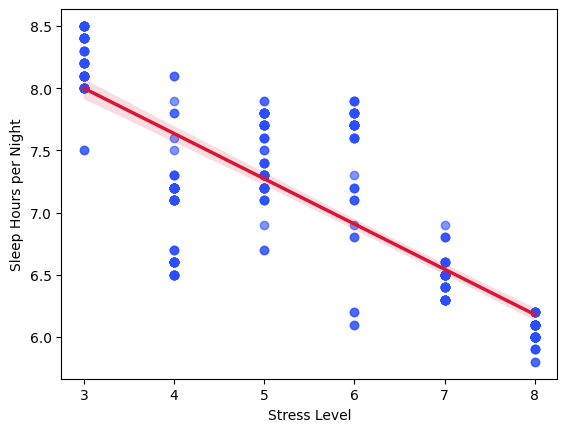

In [41]:
sns.regplot(
    data=health,
    x="stress_level",
    y="sleep_hours",
    scatter_kws={'color': "#2b4efe", 'alpha': 0.6},
    line_kws={'color': "#d91735", 'linewidth': 2.5}
)
plt.xlabel("Stress Level")
plt.ylabel("Sleep Hours per Night")

**Observations:** The regplot confirms the correlation analysis, showing a strong and direct negative trend between sleep and stress. 

In [42]:
from scipy.stats import pearsonr
correlation, p_value = pearsonr(health['stress_level'], health['sleep_hours'])
r_squared = correlation ** 2
r_squared_percent = r_squared * 100
print("Correlation, Stress & Sleep: ", correlation)
print("P-value, Stress & Sleep: ", p_value)
print("r-squared: ", r_squared)
print(f"r-squared percent: {r_squared_percent:.2f}%")

Correlation, Stress & Sleep:  -0.8110230278940431
P-value, Stress & Sleep:  1.2378076181537577e-88
r-squared:  0.6577583517744219
r-squared percent: 65.78%


**Observations:** We can see from our r-squared that stress explains ~66% of the variation in sleep hours—much stronger than activity levels. The low p-value (<0.05) gives confidence that this high variation is not due to an error or chance.  

In short, high stress is likely to result in short sleep duration. But what impacts stress?

### RHR and stress

Text(0, 0.5, 'Stress Level')

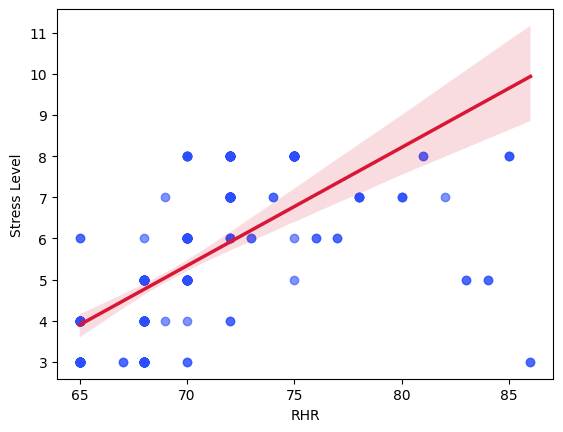

In [44]:
sns.regplot(
    data=health,
    x="rhr",
    y="stress_level",
    scatter_kws={'color': "#2b4efe", 'alpha': 0.6},
    line_kws={'color': "#d91735", 'linewidth': 2.5}
)
plt.xlabel("RHR")
plt.ylabel("Stress Level")

**Observation:** The cluster at the bottom (where the CI is tightest) indicates that lower RHR is associated with lower stress level. 

In [12]:
from scipy.stats import pearsonr
correlation, p_value = pearsonr(health['stress_level'], health['rhr'])
r_squared = correlation ** 2
r_squared_percent = r_squared * 100
print("Correlation, Stress & Resting Heart Rate: ", correlation)
print("P-value, Stress & Resting Heart Rate: ", p_value)
print("r-squared: ", r_squared)
print(f"r-squared percent: {r_squared_percent:.2f}%")

Correlation, Stress & Resting Heart Rate:  0.6700264629986893
P-value, Stress & Resting Heart Rate:  4.492926517161453e-50
r-squared:  0.44893546111853394
r-squared percent: 44.89%


**Observation:** Stress explains 45% of the variation in resting heart rate, with a high correlation factor 0.66 showing a strong positive relationship between high stress and high RHR.

Having higher (or lower) stress is associated with having higher (or lower) RHR.

## RHR and sleep quality

Text(0, 0.5, 'Sleep Quality')

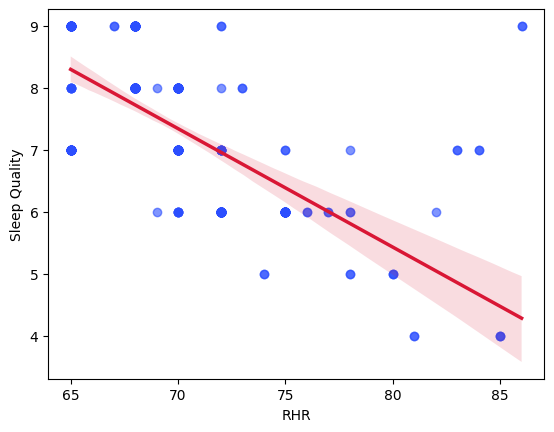

In [13]:
sns.regplot(
    data=health,
    x="rhr",
    y="sleep_quality",
    scatter_kws={'color': "#2b4efe", 'alpha': 0.6},
    line_kws={'color': "#d91735", 'linewidth': 2.5}
)
plt.xlabel("RHR")
plt.ylabel("Sleep Quality")

In [14]:
from scipy.stats import pearsonr
correlation, p_value = pearsonr(health['sleep_quality'], health['rhr'])
r_squared = correlation ** 2
r_squared_percent = r_squared * 100
print("Correlation, Sleep Quality & Resting Heart Rate: ", correlation)
print("P-value, Sleep Quality & Resting Heart Rate: ", p_value)
print("r-squared: ", r_squared)
print(f"r-squared percent: {r_squared_percent:.2f}%")

Correlation, Sleep Quality & Resting Heart Rate:  -0.6598647331480081
P-value, Sleep Quality & Resting Heart Rate:  4.1319986233668486e-48
r-squared:  0.43542146605249193
r-squared percent: 43.54%


**Observation:** RHR explains 44% of the variation in sleep quality, with a strong (-0.66) negative correlation. This suggests a statistically significant relationship between higher resting heart rate and lower sleep quality.

**Remember:** our correlation analysis showed an almost 1:1 relationship between sleep quality and sleep duration. 

# BMI categories and sleep

### Sleep Duration Overview
The dataset shows participants averaged 7.2 hours of sleep per night (median: 7.0).
Let's examine how sleep duration varies across BMI categories.

Avg. Sleep Hours:  7.13
Median Sleep Hours:  7.2


Text(0, 0.5, 'Sleep Hours')

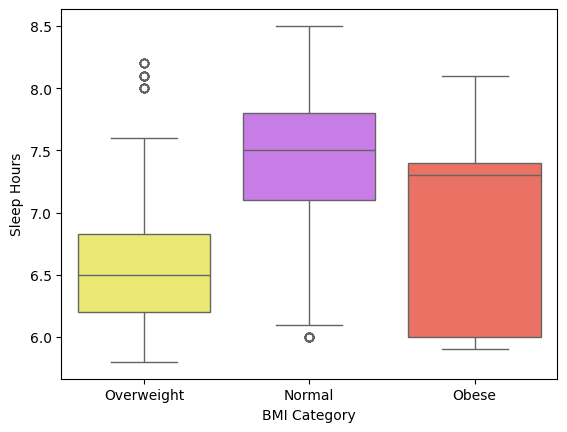

In [16]:
print("Avg. Sleep Hours: ", str(health.sleep_hours.mean().round(2)))
print("Median Sleep Hours: ", str(health.sleep_hours.median().round(2)))

sns.boxplot(
    data=health,
    x="bmi_category",
    y="sleep_hours",
    hue="bmi_category",
    palette=["#fffc5f", "#cf6bf7", "#ff604e"]
)
plt.xlabel("BMI Category")
plt.ylabel("Sleep Hours")

In [17]:
df_normal = health[health["bmi_category"]=="Normal"]["sleep_hours"]
df_overweight = health[health["bmi_category"]=="Overweight"]["sleep_hours"]
df_obease = health[health["bmi_category"]=="Obese"]["sleep_hours"]

# H0: BMI does not impact sleep hours
# H1: BMI does impact sleep hours

#Significance level: 5%
alpha = 0.05

results = st.f_oneway(df_normal, df_overweight, df_obease)
print("Results: ", str(results))


Results:  F_onewayResult(statistic=np.float64(31.001718690897327), pvalue=np.float64(3.545813768064132e-13))


**Observations:** The boxplot showed variation in sleep hours between BMI groups—generally lower for overweight and obese people. The boxplot was chosen in order to handle outliers. A simple bar chart showed much less variation between groups due to these outliers distorting the mean. To confirm the hypothesis that BMI impacts sleep, I ran an ANOVA test. A large f-statistic (31) and extremely small p-value (<0.05) indicates that we can reject the null hypothesis. 

### Blood Pressure and Stress

In [18]:
# apply function to create columns for systolic and diastolic
health = fn.create_bp_columns(health)

In [19]:
# apply function to create rows for blood pressure categories 
health["bp_category"] = health.apply(fn.bp_category, axis=1)

health["bp_category"].value_counts()

bp_category
High (Stage 1)    232
High (Stage 2)    100
Normal             41
Elevated            1
Name: count, dtype: int64

In [20]:
health_filtered = health[health['bp_category'] != 'Elevated']

Text(0, 0.5, 'Stress level')

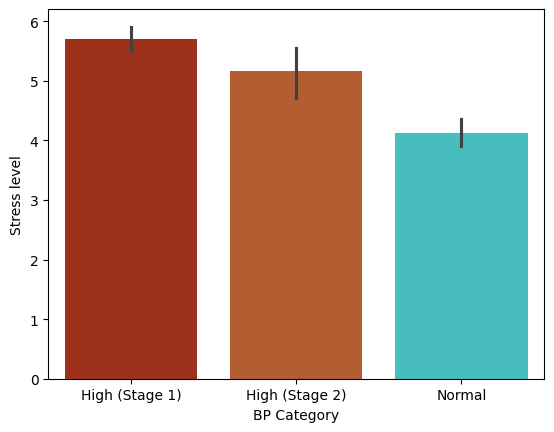

In [21]:
sns.barplot(
    data=health_filtered,
    x="bp_category",
    y="stress_level",
    hue="bp_category",
    palette=["#B32103", "#ca561c", "#33d0d3"]
)
plt.xlabel("BP Category")
plt.ylabel("Stress level")


# elevated n=1, not statistically significant

In [22]:
bp_normal = health[health["bp_category"]=="Normal"]["stress_level"]
bp_high_1 = health[health["bp_category"]=="High (Stage 1)"]["stress_level"]
bp_high_2 = health[health["bp_category"]=="High (Stage 2)"]["stress_level"]

# H0: High stress is not correlated to high blood pressure
# H1: High stress is correlated to high blood pressure

#Significance level: 5%
alpha = 0.05

results = st.f_oneway(bp_normal, bp_high_1, bp_high_2)
print("Results: ", str(results))


Results:  F_onewayResult(statistic=np.float64(16.07468925983478), pvalue=np.float64(2.0213876326838604e-07))


**Observations:** Stress and high blood pressure have a statistically significant relationship.

# Machine Learning 

In [24]:
# reshape the data from 1D to 2D
X = health[['stress_level']]  
y = health['sleep_hours']

In [25]:
# Train, Test, Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [26]:
# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Predictions
y_pred = lm.predict(X_test)
predictions = lm.predict(X_test)
print("predicted values:", predictions)

# Print coefs
print("intercept:", lm.intercept_, "coeficent:", lm.coef_)

# R² score
r2 = lm.score(X_test, y_test)

# Errors
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)

print("R²:", r2)
print("MSE:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

predicted values: [7.96136897 6.16492977 6.16492977 7.24279329 6.88350545 6.52421761
 7.24279329 6.16492977 6.16492977 7.60208113 6.88350545 6.88350545
 6.16492977 6.16492977 6.88350545 6.16492977 7.24279329 7.96136897
 7.96136897 6.88350545 7.24279329 7.24279329 7.60208113 6.16492977
 7.60208113 6.52421761 6.16492977 7.96136897 6.88350545 7.96136897
 6.16492977 7.24279329 7.24279329 6.52421761 7.96136897 7.96136897
 6.16492977 6.52421761 7.60208113 7.96136897 7.96136897 6.88350545
 6.88350545 7.96136897 7.60208113 6.16492977 7.24279329 6.52421761
 7.60208113 6.16492977 6.88350545 7.96136897 7.24279329 7.24279329
 7.24279329 7.24279329 6.88350545 7.24279329 6.88350545 6.88350545
 6.16492977 6.52421761 6.52421761 6.52421761 6.52421761 7.24279329
 6.16492977 7.60208113 7.24279329 6.16492977 6.88350545 7.96136897
 6.16492977 6.16492977 7.60208113]
intercept: 9.039232485625199 coeficent: [-0.35928784]
R²: 0.6480442784604241
MSE: 0.248183532353196
Root Mean Squared Error: 0.4981802207567016

**Observations:** 
- Intercept: 91.2 hours (theoretical sleep with zero stress)
- Coeficent: -0.37. For every 1-point increase in stress you lose .37 hours (22 minutes) of sleep.
- R-squared: Model explains 61% fo variance in unseen data.
- MAE: 0.35 hours (~21 minutes average error in predictions)

# Connecting an API: Our World In Data

In [27]:
import pandas as pd
import requests

# Fetch the data.
cvd_data = pd.read_csv("https://ourworldindata.org/grapher/death-rate-from-cardiovascular-disease-age-standardized-ghe.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
metadata = requests.get("https://ourworldindata.org/grapher/death-rate-from-cardiovascular-disease-age-standardized-ghe.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

In [28]:
cvd_data = cl.clean_cvd_data(cvd_data) # apply wraper function

#view by top 15
cvd_2021 = cvd_data[cvd_data["year"] == 2021].sort_values(by="cvd_death_rate", ascending=True)

cvd_2021

,country,code,year,cvd_death_rate
3409,San Marino,SMR,2021,60.133038
3717,South Korea,KOR,2021,60.415630
1979,Japan,JPN,2021,69.253530
1451,France,FRA,2021,70.002360
1913,Israel,ISR,2021,70.687570
...,...,...,...,...
2529,Micronesia (country),FSM,2021,500.594200
4289,Vanuatu,VUT,2021,512.030300
4267,Uzbekistan,UZB,2021,512.862600
3629,Solomon Islands,SLB,2021,566.071700


# Webscraping Wikipedia

In [29]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy'
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
tables = pd.read_html(response.content)

In [30]:
life_exp = tables[1]  # find correct table
life_exp = cl.clean_wiki_data(life_exp)  # clean it using # clean_wiki_data wrapper function

In [31]:
life_exp = life_exp.sort_values(by="life_expectancy", ascending=False)
life_exp

,country,life_expectancy
1,Japan,84.71
2,South Korea,84.33
3,French Polynesia,84.07
4,Andorra,84.04
5,Switzerland,83.95
...,...,...
206,South Sudan,57.62
207,Central African Republic,57.41
208,Lesotho,57.38
209,Chad,55.07


## Merge CVD data and life expectancy data

In [32]:
df_merged = cvd_2021.merge(life_exp, on="country", how="inner")
df_merged.head(20)

,country,code,year,cvd_death_rate,life_expectancy
0,South Korea,KOR,2021,60.415630,84.33
1,Japan,JPN,2021,69.253530,84.71
2,France,FRA,2021,70.002360,83.33
3,Israel,ISR,2021,70.687570,82.41
4,Australia,AUS,2021,71.378100,83.92
5,Andorra,AND,2021,72.581800,84.04
6,Luxembourg,LUX,2021,74.000370,82.23
7,Norway,NOR,2021,74.612976,83.31
8,Belgium,BEL,2021,75.250534,82.11
9,Switzerland,CHE,2021,76.227066,83.95


Text(0, 0.5, 'Life expectancy in years')

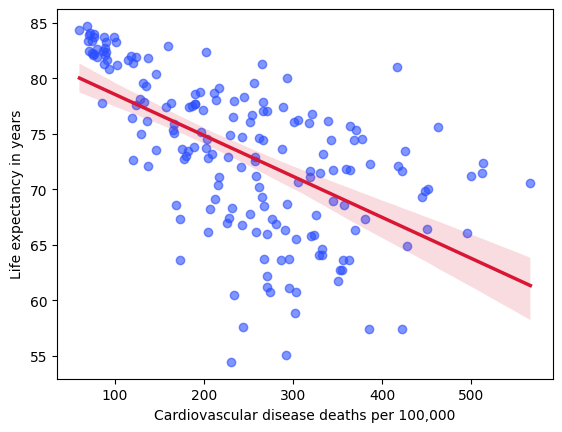

In [33]:
sns.regplot(data=df_merged,
            x="cvd_death_rate",
            y="life_expectancy",
            scatter_kws={'color': "#2b4efe", 'alpha': 0.6},
            line_kws={'color': "#d91735", 'linewidth': 2.5})
plt.xlabel("Cardiovascular disease deaths per 100,000")
plt.ylabel("Life expectancy in years")

In [34]:
correlation, p_value = pearsonr(df_merged['cvd_death_rate'], df_merged['life_expectancy'])
r_squared = correlation ** 2
r_squared_percent = r_squared * 100
print("Correlation, Cardiovascular Disease Deaths & Life Expectancy: ", correlation)
print("P-value, Cardiovascular Disease Deaths & Life Expectancy: ", p_value)
print("r-squared: ", r_squared)
print(f"r-squared percent: {r_squared_percent:.2f}%")

Correlation, Cardiovascular Disease Deaths & Life Expectancy:  -0.5902588882518945
P-value, Cardiovascular Disease Deaths & Life Expectancy:  2.7839514865324054e-18
r-squared:  0.34840555516036253
r-squared percent: 34.84%


**Observations:** A correlation coefficient of -0.6 shows a strong negative correlation between life expectancy and cardiovascular disease. As cardiovascular disease prevalence rises, life expectancy falls. An r-squared of 0.34 of 0.34 indicates that CVD death rates explain 34% of the variation in life expectancy across countries."

In [35]:
# reshape the data from 1D to 2D
X = df_merged[['cvd_death_rate']]  
y = df_merged['life_expectancy']

In [36]:
# Train, Test, Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [37]:
# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Predictions
y_pred = lm.predict(X_test)
predictions = lm.predict(X_test)
print("predicted values:", predictions)

# Print coefs
print("intercept:", lm.intercept_, "coeficent:", lm.coef_)

# R² score
r2 = lm.score(X_test, y_test)

# Errors
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)

print("R²:", r2)
print("MSE:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

predicted values: [70.24176546 70.33054166 68.02691096 74.71161958 70.80561128 72.68718259
 72.6676192  77.30947111 66.11938136 78.19351935 75.59651082 65.13072675
 79.5372326  79.26363813 69.83227476 77.36680035 65.2485241  78.68533256
 69.47479454 79.13514897 75.85184037 73.71425945 65.17432305 74.94481327
 71.93440703 70.88406578 66.47951319 73.26153983 67.88628411 79.19742608
 72.12436598 79.53400357 68.83856947 72.31964756 75.91862774 71.16199866]
intercept: 82.64214501875276 coeficent: [-0.03879468]
R²: 0.21573450129446758
MSE: 40.81944825605303
Root Mean Squared Error: 6.389009958988406
Mean Absolute Error: 4.980596637360268


**Observations:** 
- Intercept: 82.87 (theoretical life expectency for a country with no CVD deaths per 100,000)
- Coeficent: -0.03 
For every 1-point increase in CVD death rate (per 100k), life expectancy decreases by 0.03 years (about 11 days).
So if CVD deaths increase by 100 per 100k people, life expectancy drops by ~3 years.
- R-squared: Model explains 15% fo variance in unseen data.
- MAE: 5.3 year average error in predictions